In [1685]:
import pandas as pd
import numpy as np

In [1686]:
df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')

In [1687]:
results=pd.DataFrame()
results["PassengerId"]=df_t["PassengerId"]

In [1688]:
results.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [1689]:
df.shape,df_t.shape

((891, 12), (418, 11))

In [1690]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1691]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1692]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1693]:
def get_deck(d_):
    print(d_.Cabin.unique())
    deck=[]
    d_.Cabin.fillna('Z',inplace=True)
    all_cabins = d_.Cabin
    for i in range(len(all_cabins)):
        deck.append(all_cabins[i][0])
    return deck

In [1694]:
decks = {
    "A":0,
    "B":1,
    "C":2,
    "D":3,
    "E":4,
    "F":5,
    "G":6,
    "Z":7,
}

In [1695]:
for d in [df,df_t]:
    d["Deck"]=get_deck(d)
    d.Deck.fillna('Z',inplace=True)  
    d.Deck=d.Deck.map(decks)


[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
[nan 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A

In [1696]:
d.Deck.value_counts()

7    327
2     35
1     18
3     13
4      9
5      8
0      7
6      1
Name: Deck, dtype: int64

In [1697]:
for d_ in [df,df_t]:
    d_.drop(["PassengerId","Ticket","Fare","Cabin"],axis=1,inplace=True)    

In [1698]:
title={
    "Mr":0,
    "Miss":1,
    "Mrs":2,
    "Rare":3,
}

In [1699]:
##extract title from name
for d_ in [df,df_t]:
    d_["Title"] = d_.Name.str.extract(' ([A-Za-z]+)\.',expand=True)
    d_.Title=d_["Title"].replace(["Jonkheer","Don","Capt","Countess","Col","Major","Rev","Dr","Lady","Dona"],'Rare')
    d_.Title=d_["Title"].replace(["Mlle","Ms"],'Miss')    
    d_.Title=d_["Title"].replace(["Mme"],'Mrs')    
    d_.Title=d_["Title"].replace(["Sir","Master"],'Mr') 
    d_.drop(["Name"],inplace=True,axis=1)
    #d_.Title=d_.Title.map(title)
    d_.Title.fillna('Rare',inplace=True)

In [1700]:
df.Title.value_counts()

Mr      558
Miss    185
Mrs     126
Rare     22
Name: Title, dtype: int64

In [1701]:
df.Deck.fillna(7.0,inplace=True)
df_t.Deck.fillna(7.0,inplace=True)

In [1702]:
import seaborn as sns
import matplotlib.pyplot as plt

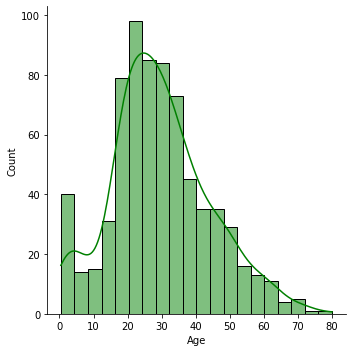

In [1703]:
#sns.pairplot(df)
sns.displot(df["Age"],kde=True,color="g")

In [1704]:
#data distribution doesn't look normal and its right skewed, to fill missing values considering median for now
#TODO:later during model optimization, will try other options for this missing data
#one option to try out is, to look for parent children column and sibling columns to may be build a model that predicts age based
#on number of siblings and parent children columns
for d in [df,df_t]:
    d.Age.fillna(df.Age.median(),inplace=True)

In [1705]:
df_t.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Deck        0
Title       0
dtype: int64

In [1706]:
#there are only 2 records that have missing embaked, we can consider for to fill those with frequent occurring embarked value
#TODO:later during model optimization, will try other options for this missing data
df.Embarked.value_counts()
for d in [df,df_t]:
    d.Embarked.fillna('S',inplace=True)

In [1707]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Deck        0
Title       0
dtype: int64

In [1708]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Deck
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,5.945006
std,0.486592,0.836071,13.019697,1.102743,0.806057,2.061500
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,7.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,7.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,7.000000


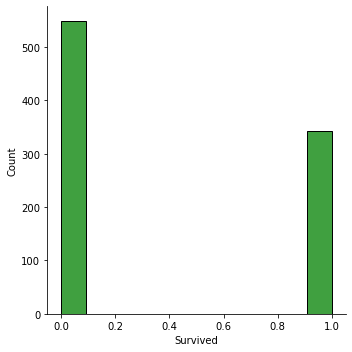

In [1709]:
sns.displot(df["Survived"],color="g")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

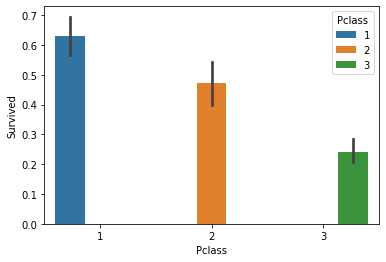

In [1710]:
sns.barplot(x="Pclass",y="Survived",data=df,hue=df.Pclass)
#chances of survival by class 1>2>3

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

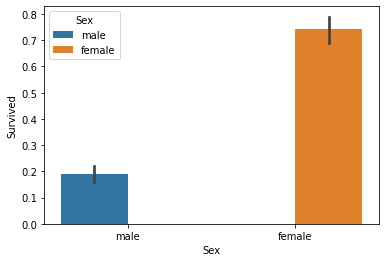

In [1711]:
sns.barplot(x="Sex",y="Survived",data=df,hue=df.Sex)
#chances of survival by sex -> female > male

In [1712]:
age_grps =[(0,10),(10.1,18),(18.1,24),(24.1,30),(30.1,40),(40.1,55),(55.1,100)]
age_grps_df= pd.DataFrame(age_grps)

In [1713]:
age_grps_df

,0,1
0,0.0,10
1,10.1,18
2,18.1,24
3,24.1,30
4,30.1,40
5,40.1,55
6,55.1,100


In [1714]:
def set_age_groups(d_):
    d_.Age = d_.Age.astype(int)
    for i in range(age_grps_df.shape[0]):
        d_.loc[(d_.Age>=age_grps_df.iloc[i][0]) & (d_.Age<=age_grps_df.iloc[i][1]),"Age_Group"]=i

In [1715]:
for d in [df,df_t]:
    set_age_groups(d)

In [1716]:
df_t.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Deck,Title,Age_Group
0,3,male,34,0,0,Q,7,Mr,4.0
1,3,female,47,1,0,S,7,Mrs,5.0
2,2,male,62,0,0,Q,7,Mr,6.0
3,3,male,27,0,0,S,7,Mr,3.0
4,3,female,22,1,1,S,7,Mrs,2.0


<AxesSubplot:xlabel='Age_Group', ylabel='Survived'>

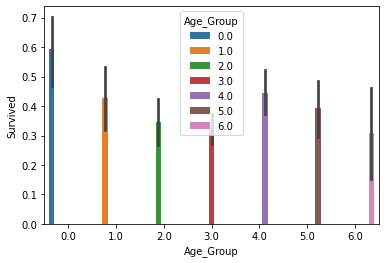

In [1717]:
sns.barplot(x="Age_Group",y="Survived",data=df,hue='Age_Group')

<AxesSubplot:xlabel='Age_Group', ylabel='Survived'>

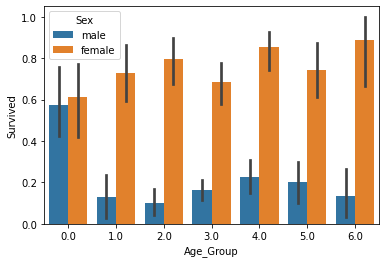

In [1718]:
sns.barplot(x="Age_Group",y="Survived",data=df,hue='Sex')
#conclusion drawn:
#1: Sex column would play an important role, as female n all age groups chances > male
#2:kids (age group 0 - 10>=age>=0) have very high survival chances, age group 2 (18 to 30) chances are too low

In [1719]:
for d in [df,df_t]:
    d.drop(["Age"],axis=1,inplace=True)

In [1720]:
df_t.head()

,Pclass,Sex,SibSp,Parch,Embarked,Deck,Title,Age_Group
0,3,male,0,0,Q,7,Mr,4.0
1,3,female,1,0,S,7,Mrs,5.0
2,2,male,0,0,Q,7,Mr,6.0
3,3,male,0,0,S,7,Mr,3.0
4,3,female,1,1,S,7,Mrs,2.0


In [1721]:
for d in [df,df_t]:
    d.Sex.replace({
        "male":1,
        "female":0
    },inplace=True)

In [1722]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Deck,Title,Age_Group
0,0,3,1,1,0,S,7.0,Mr,2.0
1,1,1,0,1,0,C,2.0,Mrs,4.0
2,1,3,0,0,0,S,7.0,Miss,3.0
3,1,1,0,1,0,S,2.0,Mrs,4.0
4,0,3,1,0,0,S,7.0,Mr,4.0


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

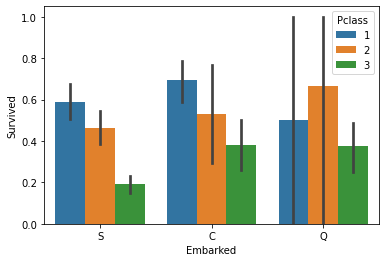

In [1723]:
sns.barplot(x="Embarked",y="Survived",data=df,hue="Pclass")
#embarked at C has high chances of survival

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

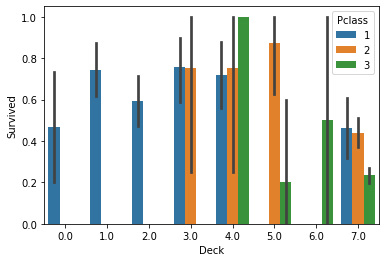

In [1724]:
sns.barplot(x="Deck",y="Survived",data=df,hue="Pclass")
#embarked at C has high chances of survival

In [1725]:
for d in [df,df_t]:
    d["isAlone"]=d["SibSp"]+d["Parch"]==0
    d.isAlone.replace({False:0,True:1},inplace=True)
    d.drop(["SibSp","Parch"],inplace=True,axis=1)

<AxesSubplot:xlabel='isAlone', ylabel='Survived'>

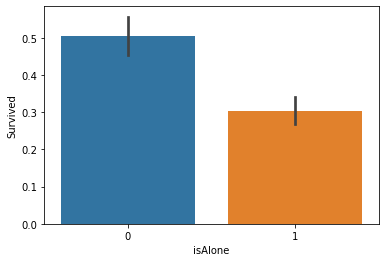

In [1726]:
sns.barplot(x="isAlone",y="Survived",data=df)

In [1727]:
from sklearn.preprocessing import OneHotEncoder

In [1728]:
df_t.Title.value_counts()

Mr      261
Miss     79
Mrs      72
Rare      6
Name: Title, dtype: int64

In [1729]:
enc = OneHotEncoder()
for d in [df,df_t]:
    for feat in ["Embarked","Pclass","Title"]:
        mat=enc.fit_transform(d[[feat]]).toarray()
        cat = [feat+str(x) for x in enc.categories_[0]]
        d[cat] = mat
        print(feat,enc.categories_)
        d.drop([feat],axis=1,inplace=True)

Embarked [array(['C', 'Q', 'S'], dtype=object)]
Pclass [array([1, 2, 3], dtype=int64)]
Title [array(['Miss', 'Mr', 'Mrs', 'Rare'], dtype=object)]
Embarked [array(['C', 'Q', 'S'], dtype=object)]
Pclass [array([1, 2, 3], dtype=int64)]
Title [array(['Miss', 'Mr', 'Mrs', 'Rare'], dtype=object)]


In [1730]:
'''emb ={"C":0, 'Q':1, 'S':2}
for d_ in [df,df_t]:
    d_.Embarked =d_.Embarked.map(emb)'''

'emb ={"C":0, \'Q\':1, \'S\':2}\nfor d_ in [df,df_t]:\n    d_.Embarked =d_.Embarked.map(emb)'

In [1731]:
title

{'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Rare': 3}

In [1734]:
#sns.barplot(x="Title",y="Survived",data=df,hue="Pclass")
df.columns

Index(['Survived', 'Sex', 'Deck', 'Age_Group', 'isAlone', 'EmbarkedC',
       'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Pclass2', 'Pclass3', 'TitleMiss',
       'TitleMr', 'TitleMrs', 'TitleRare'],
      dtype='object')

In [1819]:
features=['Sex', 'Deck', 'Age_Group', 'isAlone', 'EmbarkedC',
       'EmbarkedQ', 'EmbarkedS', 'Pclass1', 'Pclass2', 'Pclass3', 'TitleMiss',
       'TitleMr', 'TitleMrs', 'TitleRare']
X_ = df[features]
y_ = df["Survived"]

In [1820]:
X_.shape,y_.shape

((891, 14), (891,))

In [1805]:
df.corr()

,Survived,Sex,Deck,Age_Group,isAlone,EmbarkedC,EmbarkedQ,EmbarkedS,Pclass1,Pclass2,Pclass3,TitleMiss,TitleMr,TitleMrs,TitleRare
Survived,1.000000,-0.543351,-0.294804,-0.059883,-0.203367,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308,0.335636,-0.520822,0.341994,-0.021481
Sex,-0.543351,1.000000,0.118282,0.095388,0.303646,-0.082853,-0.074115,0.119224,-0.098013,-0.064746,0.137143,-0.693916,0.954931,-0.550146,0.071958
Deck,-0.294804,0.118282,1.000000,-0.228445,0.137515,-0.247556,0.128407,0.136063,-0.820018,0.202012,0.542122,-0.031998,0.133636,-0.103289,-0.101061
Age_Group,-0.059883,0.095388,-0.228445,1.000000,0.181963,0.018012,-0.020963,-0.002587,0.294794,0.022715,-0.272482,-0.274217,0.047530,0.177625,0.169720
isAlone,-0.203367,0.303646,0.137515,0.181963,1.000000,-0.095298,0.086464,0.029074,-0.113364,-0.039070,0.129472,-0.048054,0.287751,-0.361624,0.040508
EmbarkedC,0.168240,-0.082853,-0.247556,0.018012,-0.095298,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329,0.036204,-0.084290,0.067872,0.015751
EmbarkedQ,0.003650,-0.074115,0.128407,-0.020963,0.086464,-0.148258,1.000000,-0.499421,-0.155342,-0.127301,0.237449,0.167531,-0.076141,-0.090432,0.002542
EmbarkedS,-0.149683,0.119224,0.136063,-0.002587,0.029074,-0.782742,-0.499421,1.000000,-0.161921,0.189980,-0.015104,-0.137144,0.121756,-0.002550,-0.015398
Pclass1,0.285904,-0.098013,-0.820018,0.294794,-0.113364,0.296423,-0.155342,-0.161921,1.000000,-0.288585,-0.626738,0.020348,-0.131395,0.093608,0.146261
Pclass2,0.093349,-0.064746,0.202012,0.022715,-0.039070,-0.125416,-0.127301,0.189980,-0.288585,1.000000,-0.565210,-0.021903,-0.087294,0.119193,0.061761


In [1806]:
'''from sklearn.preprocessing import Normalizer
nrm = Normalizer()
for d_ in [df,df_t]:
    d_ = pd.DataFrame(nrm.fit_transform(X_))
    d_.columns=["Sex","Title","Deck","Embarked","Age_Group"]'''

'from sklearn.preprocessing import Normalizer\nnrm = Normalizer()\nfor d_ in [df,df_t]:\n    d_ = pd.DataFrame(nrm.fit_transform(X_))\n    d_.columns=["Sex","Title","Deck","Embarked","Age_Group"]'

In [1807]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [1808]:
X_t,X_CV_t,y_t,y_cv_t = train_test_split(X_,y_,test_size=0.25,random_state=5)
clf= tree.DecisionTreeClassifier()
scores = cross_val_score(clf,X_,y_,cv=5)

In [1809]:
d_tree_score=scores.mean()

In [1810]:
from sklearn.ensemble import RandomForestClassifier

In [1811]:
clf= RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf,X_,y_,cv=5)
rf_tree_score = scores.mean()
print(rf_tree_score)

0.7912748728893353


In [1812]:
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(alpha=0.001)
scores = cross_val_score(clf,X_,y_,cv=5)
sgd_score = scores.mean()

In [1813]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn,X_,y_,cv=2)
knn_score = scores.mean()

In [1814]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(clf,X_,y_,cv=5)
clf.fit(X_t,y_t)
#clf.score(X_CV_t,y_cv_t)
logi_score = scores.mean()

In [1815]:
df_scores = pd.DataFrame({
    'algo':['DecisionTreeClassifier',"RandomForestClassifier","SGDClassifier","KNeighborsClassifier","LogisticRegression"],
    "scores":[d_tree_score,rf_tree_score,sgd_score,knn_score,logi_score]
})
df_scores=df_scores.set_index('algo')

In [1816]:
df_scores.sort_values(by='scores',ascending=False)

,scores
algo,
LogisticRegression,0.794633
RandomForestClassifier,0.791275
DecisionTreeClassifier,0.789053
KNeighborsClassifier,0.781153
SGDClassifier,0.756519


In [1817]:
clf=clf.fit(X_,y_)

In [1818]:
clf.score(X_CV_t,y_cv_t)

0.8385650224215246

In [1800]:
importances = pd.DataFrame({'feature':X_.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [1801]:
df.corr()

,Survived,Sex,Deck,Age_Group,isAlone,EmbarkedC,EmbarkedQ,EmbarkedS,Pclass1,Pclass2,Pclass3,TitleMiss,TitleMr,TitleMrs,TitleRare
Survived,1.000000,-0.543351,-0.294804,-0.059883,-0.203367,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308,0.335636,-0.520822,0.341994,-0.021481
Sex,-0.543351,1.000000,0.118282,0.095388,0.303646,-0.082853,-0.074115,0.119224,-0.098013,-0.064746,0.137143,-0.693916,0.954931,-0.550146,0.071958
Deck,-0.294804,0.118282,1.000000,-0.228445,0.137515,-0.247556,0.128407,0.136063,-0.820018,0.202012,0.542122,-0.031998,0.133636,-0.103289,-0.101061
Age_Group,-0.059883,0.095388,-0.228445,1.000000,0.181963,0.018012,-0.020963,-0.002587,0.294794,0.022715,-0.272482,-0.274217,0.047530,0.177625,0.169720
isAlone,-0.203367,0.303646,0.137515,0.181963,1.000000,-0.095298,0.086464,0.029074,-0.113364,-0.039070,0.129472,-0.048054,0.287751,-0.361624,0.040508
EmbarkedC,0.168240,-0.082853,-0.247556,0.018012,-0.095298,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329,0.036204,-0.084290,0.067872,0.015751
EmbarkedQ,0.003650,-0.074115,0.128407,-0.020963,0.086464,-0.148258,1.000000,-0.499421,-0.155342,-0.127301,0.237449,0.167531,-0.076141,-0.090432,0.002542
EmbarkedS,-0.149683,0.119224,0.136063,-0.002587,0.029074,-0.782742,-0.499421,1.000000,-0.161921,0.189980,-0.015104,-0.137144,0.121756,-0.002550,-0.015398
Pclass1,0.285904,-0.098013,-0.820018,0.294794,-0.113364,0.296423,-0.155342,-0.161921,1.000000,-0.288585,-0.626738,0.020348,-0.131395,0.093608,0.146261
Pclass2,0.093349,-0.064746,0.202012,0.022715,-0.039070,-0.125416,-0.127301,0.189980,-0.288585,1.000000,-0.565210,-0.021903,-0.087294,0.119193,0.061761


<AxesSubplot:xlabel='feature'>

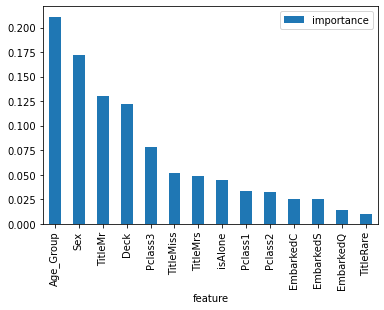

In [1802]:
importances.plot.bar()

In [161]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [162]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [1774]:
results["Survived"] = clf.predict(df_t[features])

In [1775]:
results.to_csv("results.csv",index=False)